#About this notebook

Just some visualizations(like WordCloud) of the tweet data for our sentiment analysis, example taken is Apple

In [0]:
!pip install alpha_vantage
!pip install vaderSentiment
!pip install googletrans

In [0]:
import tweepy
import json
import csv
from pprint import pprint
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import re
import string
import seaborn as sns
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from googletrans import Translator
translator = Translator()

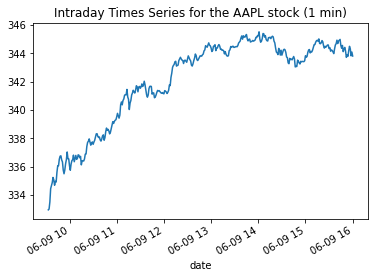

In [0]:
#ALPHA-VANTAGE INTRADAY STOCK DATA: 1MIN INTERVAL

ts = TimeSeries(key='2ZJEXZ6IRC95SZHM', output_format='pandas')
data, meta_data = ts.get_intraday(symbol='AAPL',interval='1min', outputsize='full')
data['4. close'].head(n=387).plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

In [0]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2020-06-09 16:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [0]:
consumer_key= 'BoSNF6BKUrGxY5XgOTvnOIXaz'
consumer_secret= 'VkNsq3jBtMHZYtlYEUZTT377yM1dHahzPNVbp8fmDDxDzEwE8C'
access_token= '1263072369280577536-Oqw2FpEPSXmwDffAGofAwV91L1A7Tz'
access_token_secret= 'H7qfOjemcbuusp1pO7p3oiSY026QvrgI4OA9KDo60dtb6'

In [0]:
#GETTING N TWEETS CONTAINING SPECIFIED KEYWORDS – TWEET TEXT AND TIME

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [0]:
search_words=['Apple','phone']
date_since='2020-06-01'

tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(1600) #n

In [0]:
date_time=[]
text_tweet=[]
social_out=[]
irrelevant=0

#FUNCTION TO CLEAN TWEET BY REMOVING LINKS AND SPECIAL CHARACTERS USING SIMPLE REGEX STATEMENTS
def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 

#FUNCTION TO REMOVE PUNCTUATION
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

#keywords_ext: IF TWEETS CONTAIN ANY OF THESE, THEY WILL BE ADDED
#keywords_ext=['stock', 'market', 'share', 'buy', 'sell', 'trade', 'sector', 'investor', 'computer', 'nyse', 'nasdaq']
for tweet in tweets:
  tweet__text=clean_tweet(tweet.text)
  tweet___text=remove_punct(tweet__text)

  #REMOVING VARIOUS SYMBOLS FROM TWEET TEXT
  emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
  qwerty=(emoji_pattern.sub(r'', tweet___text)) # no emoji

  #for key1 in keywords_ext:
    #if (qwerty.find(key1) != -1):
  text_tweet.append(qwerty)
  date_time.append(tweet.created_at)
  social_out.append(tweet.user.followers_count)
  print(tweet.text)
    #else:
      #irrelevant=irrelevant+1

Did you know?😮
Steve Jobs used sleight of hand at the first iPhone presentation. 
At that time, the phone was too b… https://t.co/BehIjqLCmP
Just like how blackberry mocked Apple for a "phone without a proper keyboard" https://t.co/DDol729oVI
ok another tmi

when i first got this phone (aug 2019) i PURPOSELY dropped my phone into a tub a of water because a… https://t.co/8sapsNkiLZ
@KBthatme @stoiicyoongi Because I don’t want my phone to blow up like those Samsung Galaxy Notes did back in 2016-i… https://t.co/IY2320gYip
@lauragroarke000 Yeah you can hun it depends where ya get it done how much or take it to Apple shop oh oh what ya l… https://t.co/03RNUCem4h
RT @cyikemen_en: 💠Happy Birthday, Seth!💠
Here’s a background image for your phone!
* Please note that on some devices it may not display pr…
RT @XCIII9394: this is the app for live streaming.

IOS: https://t.co/uuHQH73JpR
i’m not sure about android

you can use your wechat/ phone…
@fridabeatriiz OMMMMMGGGGGGG I just tried to eat my 

KeyboardInterrupt: ignored

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    # remove twitter Return handles (RT @xxx:)
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")
    # remove twitter handles (@xxx)
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")
    # remove URL links (httpxxx)
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    lst = np.core.defchararray.replace(lst, "[^a-zA-Z#]", " ")
    return lst

In [0]:
text_tweet=clean_tweets(text_tweet)

In [0]:
a

array(['Did you know Steve Jobs used sleight of hand at the first iPhone presentation At that time the phone was too b',
       'Just like how blackberry mocked Apple for a phone without a proper keyboard',
       'ok another tmi when i first got this phone aug  i PURPOSELY dropped my phone into a tub a of water because a',
       'Because I don’t want my phone to blow up like those Samsung Galaxy Notes did back in i',
       'Yeah you can hun it depends where ya get it done how much or take it to Apple shop oh oh what ya l',
       'RT en Happy Birthday Seth Here’s a background image for your phone Please note that on some devices it may not display pr…',
       'RT this is the app for live streaming IOS i’m not sure about android you can use your wechat phone…',
       'OMMMMMGGGGGGG I just tried to eat my phone I already know it’s bone apple tea \U0001f975\U0001f975\U0001f975 chefs kiss muaaah',
       'RT en Happy Birthday Seth Here’s a background image for your phone Please note t

In [0]:
text_tweet

['Did you know Steve Jobs used sleight of hand at the first iPhone presentation At that time the phone was too b',
 'Just like how blackberry mocked Apple for a phone without a proper keyboard',
 'ok another tmi when i first got this phone aug  i PURPOSELY dropped my phone into a tub a of water because a',
 'Because I don’t want my phone to blow up like those Samsung Galaxy Notes did back in i',
 'Yeah you can hun it depends where ya get it done how much or take it to Apple shop oh oh what ya l',
 'RT en Happy Birthday Seth Here’s a background image for your phone Please note that on some devices it may not display pr…',
 'RT this is the app for live streaming IOS i’m not sure about android you can use your wechat phone…',
 'OMMMMMGGGGGGG I just tried to eat my phone I already know it’s bone apple tea \U0001f975\U0001f975\U0001f975 chefs kiss muaaah',
 'RT en Happy Birthday Seth Here’s a background image for your phone Please note that on some devices it may not display pr…',
 'RT this

In [0]:
date_tweet=[]
for x in date_time:
  y=x.strftime('%y-%m-%d')
  date_tweet.append(y)

In [0]:
date_tweet

In [0]:
tweet_dict={'Date/Time':date_time,'Text':text_tweet,'Date':date_tweet}
tweet_df=pd.DataFrame(data=tweet_dict)

In [0]:
analyser = SentimentIntensityAnalyzer()
scores = []
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text
    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
scores=[]
for x in text_tweet:
  sentiment_score = sentiment_analyzer_scores(x)
  scores.append(sentiment_score)

In [0]:
tweet_df['SentimentScore']=scores

In [0]:
tweet_df.groupby(['Date']).mean()

,SentimentScore
Date,
20-06-09,0.099828
20-06-10,0.026764


In [0]:
tweet_df

,Date/Time,Text,Date,SentimentScore
0,2020-06-10 07:19:21,Did you know Steve Jobs used sleight of hand a...,20-06-10,1
1,2020-06-10 07:18:39,Just like how blackberry mocked Apple for a ph...,20-06-10,1
2,2020-06-10 07:18:18,ok another tmi when i first got this phone aug...,20-06-10,1
3,2020-06-10 07:17:28,Because I don’t want my phone to blow up like ...,20-06-10,1
4,2020-06-10 07:11:41,Yeah you can hun it depends where ya get it do...,20-06-10,1
...,...,...,...,...
987,2020-06-09 16:31:06,RT Check out ep Keeping it Light This week we ...,20-06-09,0
988,2020-06-09 16:30:58,my phone is on five whole gigabytes apple explain,20-06-09,0
989,2020-06-09 16:30:18,Yo Apple how has there still not been an easie...,20-06-09,0
990,2020-06-09 16:29:51,RT Still happy about buying the Apple phone,20-06-09,1


In [0]:
#CODE FOR GETTING LAST FEW TWEETS FROM A SPECIFIED USER: TEXT, DATE, TIME, REPLY/NON-REPLY, RETWEET/NON-RETWEET ETC.

consumer_key= 'BoSNF6BKUrGxY5XgOTvnOIXaz'
consumer_secret= 'VkNsq3jBtMHZYtlYEUZTT377yM1dHahzPNVbp8fmDDxDzEwE8C'
access_key= '1263072369280577536-Oqw2FpEPSXmwDffAGofAwV91L1A7Tz'
access_secret= 'H7qfOjemcbuusp1pO7p3oiSY026QvrgI4OA9KDo60dtb6'
#initialize a list to hold all the tweepy Tweets
alltweets = []
user_=str(input('Enter username: '))
def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,
                                   count=200, 
                                   exclude_replies=True, 
                                   include_entities=False, 
                                   contributor_details=False,
                                   since_id=None,
                                   max_id=None,
                                   trim_user=True
                                  )
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        print(f"getting tweets before {oldest}")
        
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        
        #save most recent tweets
        alltweets.extend(new_tweets)
        
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        
        print(f"...{len(alltweets)} tweets downloaded so far")
    
    #transform the tweepy tweets into a 2D array that will populate the csv 
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text] for tweet in alltweets]
    
    #write the csv  
    with open(f'new_{screen_name}_tweets.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text"])
        writer.writerows(outtweets)
    
    pass


if __name__ == '__main__':
	#pass in the username of the account you want to download
	get_all_tweets(user_)
date_tweet=[]
time_tweet=[]
last_50_tweets=[]
retweets=[]
non_retweets=[]
replies_tweet=[]
for i in range (50):
  p=json.dumps(alltweets[i]._json)
  q=p[16:26]
  date_tweet.append(q)
  y=p[27:35]
  time_tweet.append(y)
  a=p.find('", "truncated"')
  x=p[118:a]
  last_50_tweets.append(x)
  if (p.find('"user_mentions": [{"screen_name":')!=-1):
    replies_tweet.append(x)
  if (x.startswith('RT @')==True):
    retweets.append(x)
  print('"'+x+'" was tweeted by: '+user_+' on: '+q+' at: '+y)
#print("Replies: "+str(replies_tweet))
#print("Retweets: "+str(retweets))

Enter username: tim_cook
getting tweets before 1163578441007947775
...396 tweets downloaded so far
getting tweets before 1055035552037253120
...596 tweets downloaded so far
getting tweets before 913544049088282623
...796 tweets downloaded so far
getting tweets before 723207693716975615
...996 tweets downloaded so far
getting tweets before 426894637911908351
...1031 tweets downloaded so far
getting tweets before 381131235247923200
...1031 tweets downloaded so far
"Today, as Minneapolis gathers and the nation memorializes George Floyd, we mourn a life ended in its prime and ever\u2026 https://t.co/MaV3incHQ7" was tweeted by: tim_cook on: Thu Jun 04 at: 18:53:06
"Minneapolis is grieving for a reason. To paraphrase Dr. King, the negative peace which is the absence of tension is\u2026 https://t.co/nFbwWyAx1g" was tweeted by: tim_cook on: Fri May 29 at: 02:54:48
"Larry Kramer was an American original who got loud, acted up, and saved many LGBTQ lives. His unrelenting efforts w\u2026 https://

In [0]:
def anl_tweets(lst, title='Tweets Sentiment', engl=True ):
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3,
        color='r',
        vertical=True
        )
    ax.set(ylabel='Negative               Neutral                Positive',
           xlabel='#Tweets',
          title="Tweets of @"+title)
    #return sents

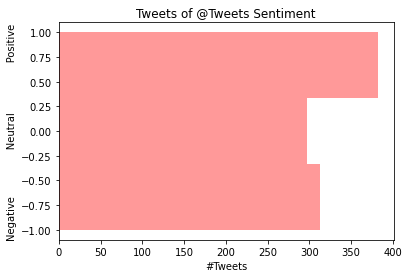

In [0]:
anl_tweets(text_tweet)

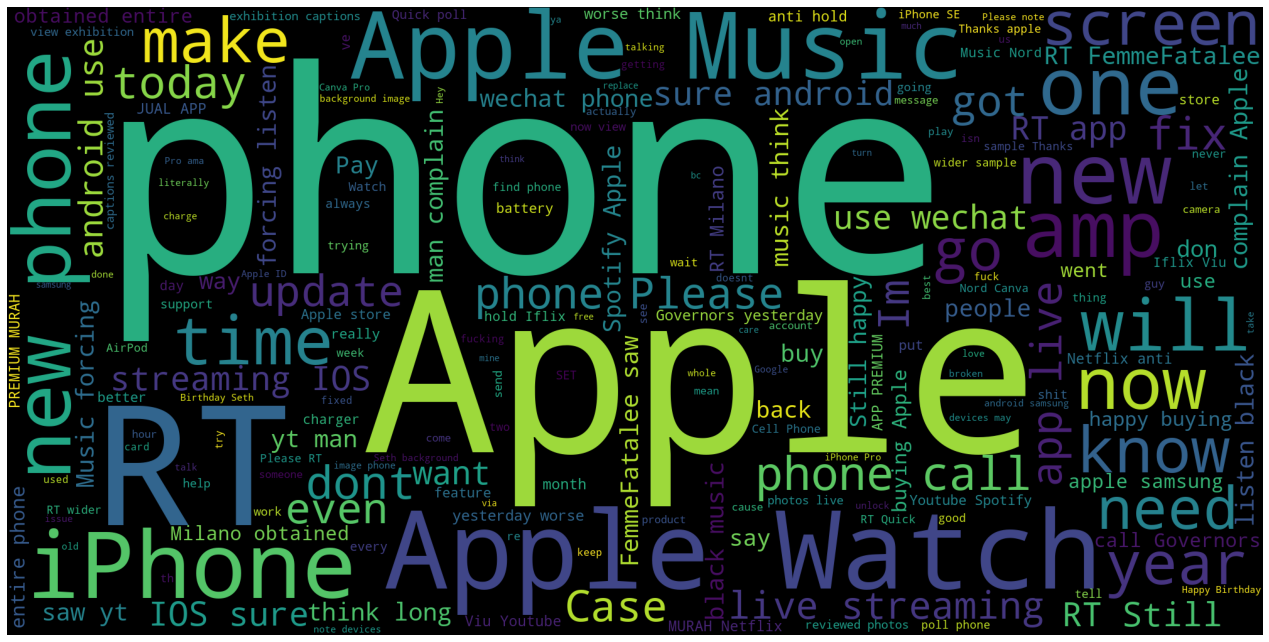

In [0]:
#import matplotlib.pyplot as plt
#from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(text_tweet)
wordcloud = WordCloud(width = 2000, height = 1000).generate(unique_string)
plt.figure(figsize=(22.5,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()